<a href="https://colab.research.google.com/github/CodeBrk3R/Projects/blob/master/Fantasy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#@title

from sys import argv
from requests import get
import pandas as pd
from bs4 import BeautifulSoup
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
sns.set(rc={'figure.figsize':(11.7,8.27)})
"""
Create virtual environment
>python -m venv venv
>source venv/bin/activate (linux/mac)
>venv\Scripts\activate

pip install requests
pip install beautifulsoup4
pip install html5lib
pip install pandas

"""

year = input('What season? Note: Input a season year 20xx:\n')
week = input('What week of the {0} season? '.format(year))

year, week = int(year), int(week)

passingURL = """ 
https://www.pro-football-reference.com/play-index/pgl_finder.cgi?request=1&match=game&year_min={year}&year_max={year}&season_start=1&season_end=-1&age_min=0&age_max=99&game_type=A&league_id=&team_id=&opp_id=&game_num_min=0&game_num_max=99&week_num_min={week}&week_num_max={week}&game_day_of_week=&game_location=&game_result=&handedness=&is_active=&is_hof=&c1stat=pass_att&c1comp=gt&c1val=1&c2stat=&c2comp=gt&c2val=&c3stat=&c3comp=gt&c3val=&c4stat=&c4comp=gt&c4val=&order_by=pass_rating&from_link=1
""".format(year=year, week=week)

receivingURL = """
https://www.pro-football-reference.com/play-index/pgl_finder.cgi?request=1&match=game&year_min={year}&year_max={year}&season_start=1&season_end=-1&age_min=0&age_max=99&game_type=A&league_id=&team_id=&opp_id=&game_num_min=0&game_num_max=99&week_num_min={week}&week_num_max={week}&game_day_of_week=&game_location=&game_result=&handedness=&is_active=&is_hof=&c1stat=rec&c1comp=gt&c1val=1&c2stat=&c2comp=gt&c2val=&c3stat=&c3comp=gt&c3val=&c4stat=&c4comp=gt&c4val=&order_by=rec_yds&from_link=1
""".format(year=year, week=week)

rushingURL = """
https://www.pro-football-reference.com/play-index/pgl_finder.cgi?request=1&match=game&year_min={year}&year_max={year}&season_start=1&season_end=-1&age_min=0&age_max=99&game_type=A&league_id=&team_id=&opp_id=&game_num_min=0&game_num_max=99&week_num_min={week}&week_num_max={week}&game_day_of_week=&game_location=&game_result=&handedness=&is_active=&is_hof=&c1stat=rush_att&c1comp=gt&c1val=1&c2stat=&c2comp=gt&c2val=&c3stat=&c3comp=gt&c3val=&c4stat=&c4comp=gt&c4val=&order_by=rush_yds&from_link=1
""".format(year=year, week=week)

urls = {
    'Passing': passingURL,
    'Receiving': receivingURL,
    'Rushing': rushingURL
}

dfs = []

defColumnSettings = {
    'axis': 1,
    'inplace': True
}

for key, url in urls.items():

    response = get(url)
    soup = BeautifulSoup(response.content, 'html.parser')
    table = soup.find('table', {'id': 'results'})

    df = pd.read_html(str(table))[0]

    df.columns = df.columns.droplevel(level = 0)

    df.drop(['Result', 'Week', 'G#', 'Opp', 'Unnamed: 7_level_1', 'Age', 'Rk', 'Lg', 'Date', 'Day'], **defColumnSettings)

    df = df[df['Pos'] != 'Pos']

    df.set_index(['Player', 'Pos', 'Tm'], inplace=True)

    if key == 'Passing':
        df = df[['Yds', 'TD', 'Int', 'Att', 'Cmp']]
        df.rename({'Yds': 'PassingYds', 'Att': 'PassingAtt', 'Y/A': 'Y/PassingAtt', 'TD': 'PassingTD'}, **defColumnSettings)
    elif key =='Receiving':
        df = df[['Rec', 'Tgt', 'Yds', 'TD']]
        df.rename({'Yds': 'ReceivingYds', 'TD': 'ReceivingTD'}, **defColumnSettings)
    elif key == 'Rushing':
        df.drop('Y/A', **defColumnSettings)
        df.rename({'Att': 'RushingAtt', 'Yds': 'RushingYds', 'TD': 'RushingTD'}, **defColumnSettings)
    dfs.append(df)

#df = dfs[0].join(dfs[1:], how='outer')
df.fillna(0, inplace=True)
df = df.astype('int64')
for item in dfs:
  item.dropna(axis=0,inplace=True)
dff = pd.concat(dfs[:])
dff.reset_index(['Player','Pos','Tm'],inplace=True)

dff.fillna(0,inplace=True)
dff = dff[dff['Player']!=0]
dff['FantasyPoints'] = dff['PassingYds']/25 + dff['PassingTD']*4 - dff['Int']*2 + dff['Rec'] + dff['ReceivingYds']/10 + dff['ReceivingTD']*6 + dff['RushingYds']/10 + dff['RushingTD']*6
dff['FP/atmp'] = dff['FantasyPoints']/(dff['PassingAtt']+dff['RushingAtt']+dff['Tgt'])
dff.reset_index(inplace=True)
dff.sort_values('FP/atmp',ascending=False)


In [56]:
#GET DRAFT KINGS SALARY DATA
from sys import argv
from requests import get
import pandas as pd
from bs4 import BeautifulSoup
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
sns.set(rc={'figure.figsize':(12,9)})
pd. set_option('display.max_columns', None) # or 1000.
pd. set_option('display.max_rows', 100) # or 1000.
pd. set_option('display.max_colwidth', -1) # or 199.

data = pd.read_html(r'https://www.footballdiehards.com/fantasyfootball/dailygames/Draftkings-Salary-data.cfm')
dataa = data[0]
dataa.columns = dataa.columns.droplevel(0)
dataa.set_index('Rank')
dataa['Player'] = [item.split(' ')[1]+' '+item.split(' ')[0][:-1]  for item in dataa['Player']]
dataa['Score']=dataa['Score'].replace('-',0).astype(float)
dataa['SALARY']=dataa['SALARY'].str[1:].astype(float)
dataa['value'] = dataa['SALARY']/dataa['Score']
dataa['value'] =dataa['value'].round(2)




/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  if sys.path[0] == '':


In [57]:
#ADDED STATS NFL.COM
passing = pd.read_html(r'https://www.nfl.com/stats/player-stats/category/passing/2021/REG/all/passingyards/desc')
passing=passing[0]


rushing=pd.read_html(r'https://www.nfl.com/stats/player-stats/category/rushing/2021/REG/all/rushingyards/desc')
rushing=rushing[0]

recieving=pd.read_html(r'https://www.nfl.com/stats/player-stats/category/receiving/2021/REG/all/receivingreceptions/desc')
recieving=recieving[0]

all = pd.merge(dataa,passing,on='Player',how='left')
all = pd.merge(all,rushing,on='Player',how='left')
all = pd.merge(all,recieving,on='Player',how='left')
all.fillna(0,inplace=True)
all['tagX']=all['Att_x']+all['Tgts']+all['Att_y']
all= all['Player	Pos	year	week	SALARY	Score	Factor	Rank	value tagX'.split()].sort_values('Factor',ascending=False)

In [58]:
all

,Player,Pos,year,week,SALARY,Score,Factor,Rank,value,tagX
0,Dalvin Cook,RB,2021,3,8400.0,24.2,2.9,2,347.11,42.0
2,Damien Harris,RB,2021,3,5600.0,15.7,2.8,13,356.69,39.0
3,Clyde Edwards-Helaire,RB,2021,3,4800.0,13.4,2.8,19,358.21,0.0
4,Antonio Gibson,RB,2021,3,5900.0,16.4,2.8,11,359.76,33.0
1,Najee Harris,RB,2021,3,6600.0,18.5,2.8,7,356.76,0.0
...,...,...,...,...,...,...,...,...,...,...
268,"Bay, Tamp",DST,2021,3,3100.0,1.3,0.3,11,2384.62,0.0
276,York Ne,DST,2021,3,2200.0,0.5,0.2,28,4400.00,0.0
277,Vikings Minnesota,DST,2021,3,2900.0,0.6,0.2,26,4833.33,0.0
278,Jaguars Jacksonville,DST,2021,3,2900.0,0.4,0.2,31,7250.00,0.0


In [59]:
recieving

,Player,Rec,Yds,TD,20+,40+,Lng,Rec 1st,1st%,Rec FUM,Rec YAC/R,Tgts
0,Sterling Shepard,16,207,1,3,0,37,10,0.625,0,0,19
1,Cooper Kupp,16,271,3,3,3,56,11,0.688,0,0,21
2,T.J. Hockenson,16,163,2,3,0,23,11,0.688,0,0,20
3,Amari Cooper,16,163,2,2,0,28,10,0.625,0,0,22
4,Mike Williams,15,173,2,2,0,27,10,0.667,0,0,22
5,Darren Waller,15,170,1,2,0,25,7,0.467,0,0,26
6,Adam Thielen,15,131,3,2,0,24,8,0.533,1,0,17
7,Deebo Samuel,15,282,1,4,2,79,9,0.600,1,0,20
8,Terry McLaurin,15,169,1,1,0,34,9,0.600,0,0,18
9,CeeDee Lamb,15,185,1,4,0,34,10,0.667,0,0,24


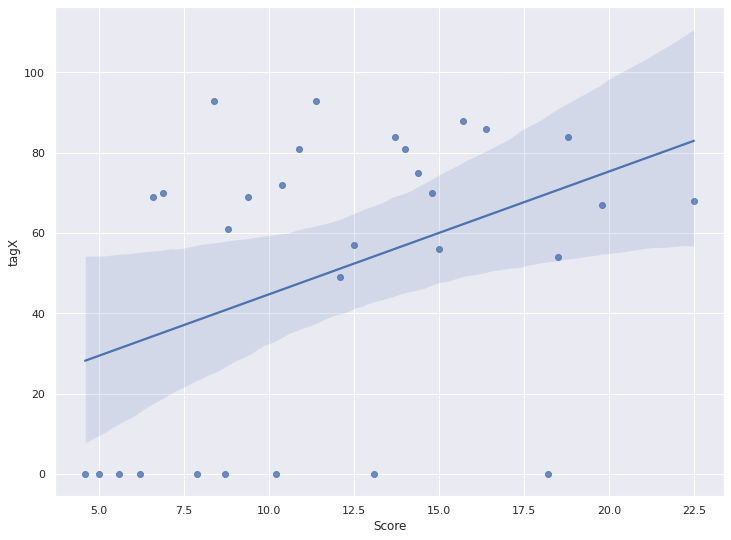

In [60]:
sns.regplot(data=all[all['Pos']=='QB'],x="Score", y="tagX")

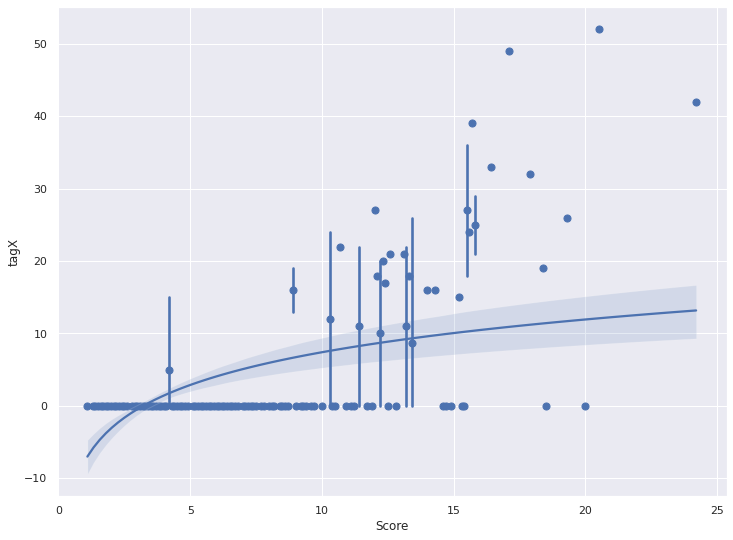

In [61]:
sns.regplot(data=all[~all['Pos'].isin(['QB','DST'])], x="Score", y="tagX",  x_estimator=np.mean,logx=True)

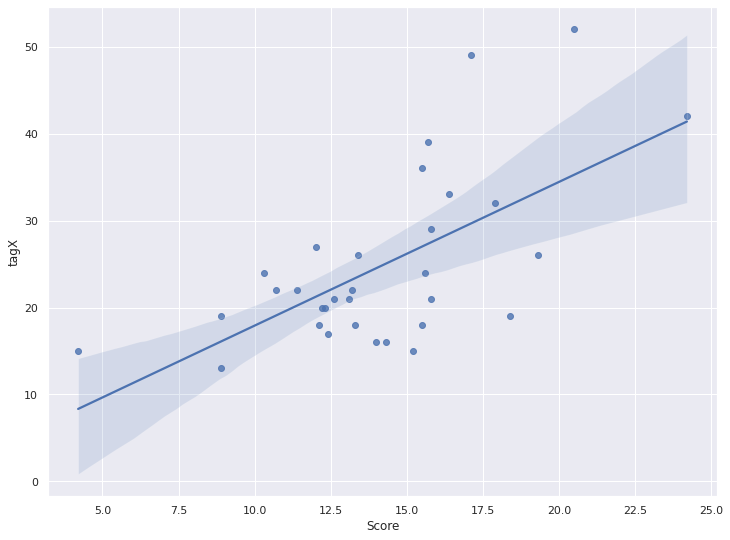

In [62]:
new = all[all['tagX']>0]
new = new[~new['Pos'].isin(['QB','DST'])]
sns.regplot(data=new,x="Score", y="tagX")

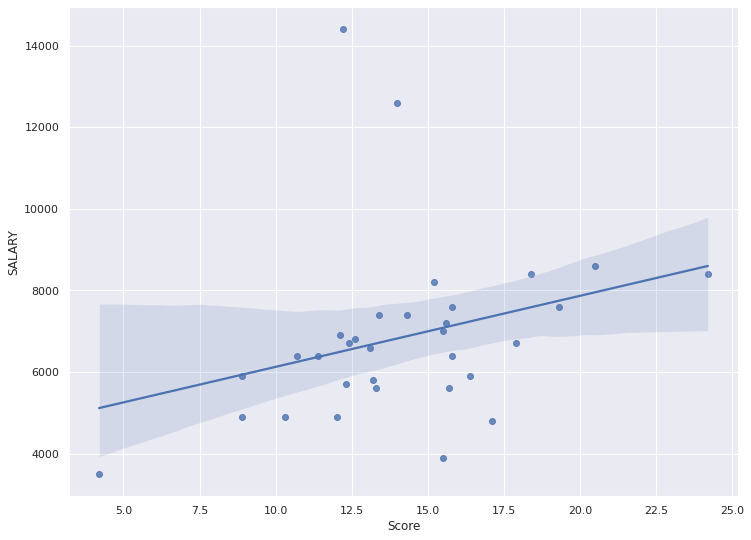

In [63]:
sns.regplot(data=new, x="Score", y="SALARY")

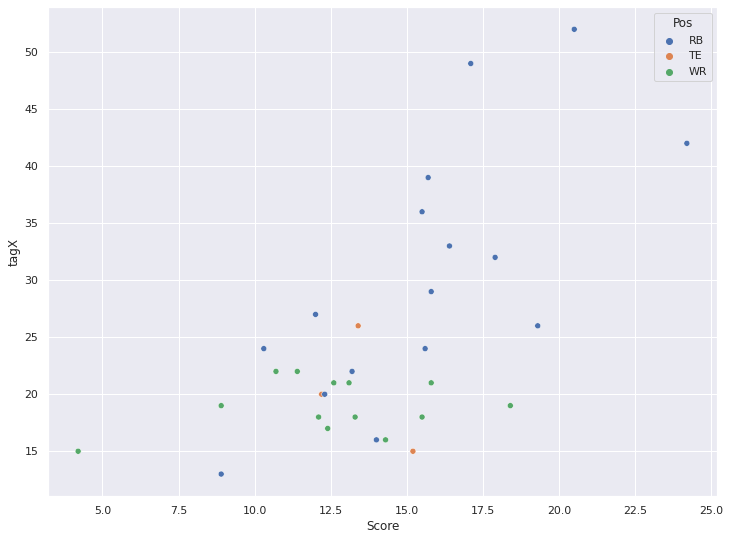

In [64]:
sns.scatterplot(data=new, x="Score", y="tagX", hue="Pos")

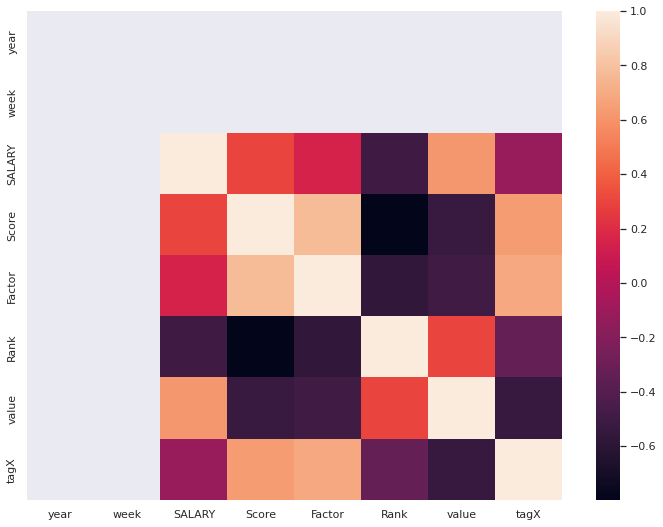

In [65]:
sns.heatmap(new.corr())

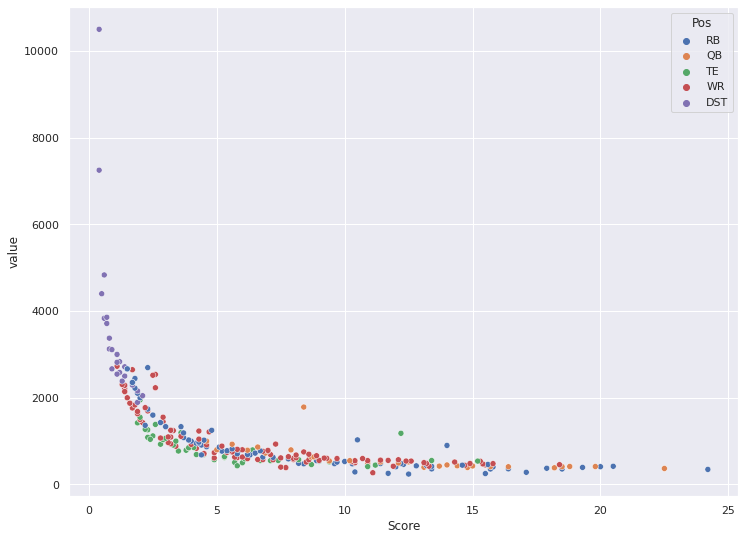

In [66]:
sns.scatterplot(data=dataa, x="Score", y="value", hue="Pos")

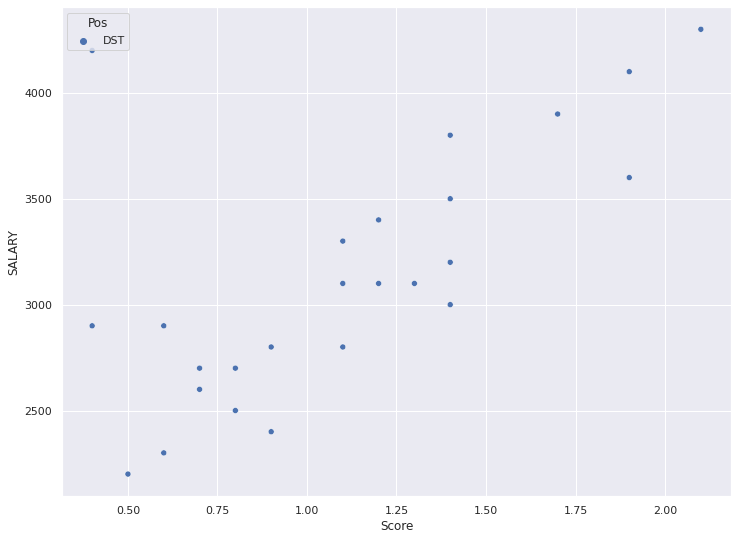

In [67]:
sns.scatterplot(data=dataa[dataa['Pos']=='DST'], x="Score", y="SALARY", hue="Pos")

In [68]:
d = dataa[dataa['Pos']=='DST']

In [69]:
d[d['Score']<1]

,Player,Pos,year,week,SALARY,Score,Factor,Rank,value
257,Bengals Cincinnati,DST,2021,3,2700.0,0.8,0.4,21,3375.00
266,Titans Tennessee,DST,2021,3,2400.0,0.9,0.4,20,2666.67
270,Falcons Atlanta,DST,2021,3,2500.0,0.8,0.3,22,3125.00
272,Bears Chicago,DST,2021,3,2800.0,0.9,0.3,19,3111.11
273,"Angeles, Lo",DST,2021,3,2300.0,0.6,0.3,27,3833.33
274,Dolphins Miami,DST,2021,3,2600.0,0.7,0.3,23,3714.29
275,Colts Indianapolis,DST,2021,3,2700.0,0.7,0.3,24,3857.14
276,York Ne,DST,2021,3,2200.0,0.5,0.2,28,4400.00
277,Vikings Minnesota,DST,2021,3,2900.0,0.6,0.2,26,4833.33
278,Jaguars Jacksonville,DST,2021,3,2900.0,0.4,0.2,31,7250.00
